In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

raw=pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/housing.csv")

In [2]:
lreg = LinearRegression()

In [3]:
X = raw[['RM', 'CRIM', 'PTRATIO']]
y = raw['PRICE']

In [4]:
X_v3 = raw.iloc[:,:13]
y_v3 = raw['PRICE']

In [5]:
lreg.fit(X_v3, y_v3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [7]:
coeffs = pd.DataFrame({
    'Variable': X_v3.columns,
    'Weight': lreg.coef_
}).sort_values(by='Weight', ascending = False)

In [8]:
coeffs

Variable     Weight
5        RM   3.809865
3      CHAS   2.686734
8       RAD   0.306049
1        ZN   0.046420
2     INDUS   0.020559
11        B   0.009312
6       AGE   0.000692
9       TAX  -0.012335
0      CRIM  -0.108011
12    LSTAT  -0.524758
10  PTRATIO  -0.952747
7       DIS  -1.475567
4       NOX -17.766611

In [ ]:
#notice how NOX is very effective
#what does coefficient mean?
#for every 1 room, the price would change by 3.8
#all else being equal, how much would each individual column 'move' the price
#what the coefficient mean is how affect price when move by exactly "1"


In [9]:
raw.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

In [ ]:
# if you look at NOX, see that adding 1 or changing by 1 would GREATLY affect it because the max and min are between 0 and 1
# whereas, changing B by 1 does not affect it as much

In [13]:
#DATA PREP!!
#you call this centering the data when you take the column and subtract mean from it

(X_v3- X_v3.mean()).describe()

CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -3.024370e-15  2.076161e-14 -2.800395e-14 -1.189760e-16  2.571505e-16   
std    8.601545e+00  2.332245e+01  6.860353e+00  2.539940e-01  1.158777e-01   
min   -3.607204e+00 -1.136364e+01 -1.067678e+01 -6.916996e-02 -1.696951e-01   
25%   -3.531479e+00 -1.136364e+01 -5.946779e+00 -6.916996e-02 -1.056951e-01   
50%   -3.357014e+00 -1.136364e+01 -1.446779e+00 -6.916996e-02 -1.669506e-02   
75%    6.355894e-02  1.136364e+00  6.963221e+00 -6.916996e-02  6.930494e-02   
max    8.536268e+01  8.863636e+01  1.660322e+01  9.308300e-01  3.163049e-01   

                 RM           AGE           DIS           RAD           TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -8.999389e-15 -3.552714e-14  1.720187e-15  4.683123e-15  3.370163e-13   
std    7.026171e-01  2.814886e+01  2.105710e+00  8.707259e+00  1.685371e+02   
min   -2.723634e+00 -6.567490e+01 -2.665443e+00 -8.549407e+00 -2.212372e+02   
25%   -3.991344e-01 -2.354990e+01 -1.694868e+00 -5.549407e+00 -1.292372e+02   
50%   -7.613439e-02  8.925099e+00 -5.875927e-01 -4.549407e+00 -7.823715e+01   
75%    3.388656e-01  2.550010e+01  1.393382e+00  1.445059e+01  2.577628e+02   
max    2.495366e+00  3.142510e+01  8.331457e+00  1.445059e+01  3.027628e+02   

            PTRATIO             B         LSTAT  
count  5.060000e+02  5.060000e+02  5.060000e+02  
mean  -2.348582e-14  7.632296e-13 -3.565001e-15  
std    2.164946e+00  9.129486e+01  7.141062e+00  
min   -5.855534e+00 -3.563540e+02 -1.092306e+01  
25%   -1.055534e+00  1.870347e+01 -5.703063e+00  
50%    5.944664e-01  3.476597e+01 -1.293063e+00  
75%    1.744466e+00  3.955097e+01  4.301937e+00  
max    3.544466e+00  4.022597e+01  2.531694e+01

In [ ]:
#but as you can see the deviation is still all over the place

In [14]:
(X_v3- X_v3.mean())/(X_v3.std())

#now have average value of zero and have a STD of 1 ... natural range of -1 to 1 
# not just linear models but most models, you'll need to do somethign to your data to make the numbers look like the below
# your values hover around zero and numeric range is pretty small

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1   -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2   -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3   -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4   -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   
5   -0.416631 -0.487240 -1.305586 -0.272329 -0.834458  0.206892 -0.350810   
6   -0.409837  0.048724 -0.476182 -0.272329 -0.264892 -0.388027 -0.070159   
7   -0.403297  0.048724 -0.476182 -0.272329 -0.264892 -0.160307  0.977841   
8   -0.395543  0.048724 -0.476182 -0.272329 -0.264892 -0.930285  1.116390   
9   -0.400333  0.048724 -0.476182 -0.272329 -0.264892 -0.399413  0.615481   
10  -0.393956  0.048724 -0.476182 -0.272329 -0.264892  0.131459  0.913895   
11  -0.406445  0.048724 -0.476182 -0.272329 -0.264892 -0.392297  0.508905   
12  -0.409199  0.048724 -0.476182 -0.272329 -0.264892 -0.563087 -1.050661   
13  -0.346887 -0.487240 -0.436826 -0.272329 -0.144075 -0.477692 -0.240681   
14  -0.345934 -0.487240 -0.436826 -0.272329 -0.144075 -0.268474  0.565746   
15  -0.347162 -0.487240 -0.436826 -0.272329 -0.144075 -0.641365 -0.428966   
16  -0.297574 -0.487240 -0.436826 -0.272329 -0.144075 -0.497617 -1.395257   
17  -0.328932 -0.487240 -0.436826 -0.272329 -0.144075 -0.419338  0.466275   
18  -0.326780 -0.487240 -0.436826 -0.272329 -0.144075 -1.179354 -1.135922   
19  -0.335721 -0.487240 -0.436826 -0.272329 -0.144075 -0.793653  0.032865   
20  -0.274571 -0.487240 -0.436826 -0.272329 -0.144075 -1.017104  1.048891   
21  -0.321045 -0.487240 -0.436826 -0.272329 -0.144075 -0.454920  0.732715   
22  -0.276817 -0.487240 -0.436826 -0.272329 -0.144075 -0.203004  0.821529   
23  -0.305189 -0.487240 -0.436826 -0.272329 -0.144075 -0.671254  1.116390   
24  -0.332878 -0.487240 -0.436826 -0.272329 -0.144075 -0.513273  0.906790   
25  -0.322382 -0.487240 -0.436826 -0.272329 -0.144075 -0.975829  0.608376   
26  -0.341987 -0.487240 -0.436826 -0.272329 -0.144075 -0.671254  0.771793   
27  -0.308986 -0.487240 -0.436826 -0.272329 -0.144075 -0.338213  0.718505   
28  -0.330235 -0.487240 -0.436826 -0.272329 -0.144075  0.299403  0.917447   
29  -0.303559 -0.487240 -0.436826 -0.272329 -0.144075  0.554165  0.665217   
..        ...       ...       ...       ...       ...       ...       ...   
476  0.146240 -0.487240  1.014995 -0.272329  0.511789  0.283747  0.889027   
477  1.326491 -0.487240  1.014995 -0.272329  0.511789 -1.395688  1.020471   
478  0.769568 -0.487240  1.014995 -0.272329  0.511789 -0.141805  0.999156   
479  1.246308 -0.487240  1.014995 -0.272329  0.511789 -0.079182  0.690085   
480  0.256987 -0.487240  1.014995 -0.272329 -0.195854 -0.060679 -0.137657   
481  0.243521 -0.487240  1.014995 -0.272329 -0.195854  0.662332  0.224702   
482  0.246193 -0.487240  1.014995 -0.272329 -0.195854  1.104963  0.299305   
483 -0.092442 -0.487240  1.014995 -0.272329 -0.195854 -0.743840 -1.004478   
484 -0.143573 -0.487240  1.014995 -0.272329  0.244266 -0.588705 -0.947637   
485  0.006993 -0.487240  1.014995 -0.272329  0.244266  0.038948 -0.592383   
486  0.241611 -0.487240  1.014995 -0.272329  0.244266 -0.242855  0.398776   
487  0.142085 -0.487240  1.014995 -0.272329  0.244266 -0.540315 -0.546200   
488 -0.402563 -0.487240  2.420170 -0.272329  0.468640 -1.182201  0.857054   
489 -0.398783 -0.487240  2.420170 -0.272329  0.468640 -1.239131  1.055996   
490 -0.395983 -0.487240  2.420170 -0.272329  0.468640 -1.695994  1.045339   
491 -0.407809 -0.487240  2.420170 -0.272329  0.468640 -0.429301  1.073759   
492 -0.407160 -0.487240  2.420170 -0.272329  0.468640 -0.429301  0.530220   
493 -0.399953 -0.487240 -0.210890 -0.272329  0.261525 -0.822118 -0.517779   
494 -0.387599 -0.487240 -0.210890 -0.272329  0.261525 -0.510426 -0.922769   
495 -0.399293 -0.487240 -0.210890 -0.272329  0.261525 -0.874779 -1.413020   
496 -

In [15]:
X_stand = (X_v3- X_v3.mean())/(X_v3.std())

In [16]:
X_stand.describe()

CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean   8.326673e-17  3.466704e-16 -3.016965e-15  3.999875e-16  3.167427e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.193669e-01 -4.872402e-01 -1.556302e+00 -2.723291e-01 -1.464433e+00   
25%   -4.105633e-01 -4.872402e-01 -8.668328e-01 -2.723291e-01 -9.121262e-01   
50%   -3.902803e-01 -4.872402e-01 -2.108898e-01 -2.723291e-01 -1.440749e-01   
75%    7.389247e-03  4.872402e-02  1.014995e+00 -2.723291e-01  5.980871e-01   
max    9.924110e+00  3.800473e+00  2.420170e+00  3.664771e+00  2.729645e+00   

                 RM           AGE           DIS           RAD           TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.258809e-14 -1.158274e-15  7.308603e-16 -1.068535e-15  6.534079e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.876413e+00 -2.333128e+00 -1.265817e+00 -9.818712e-01 -1.312691e+00   
25%   -5.680681e-01 -8.366200e-01 -8.048913e-01 -6.373311e-01 -7.668172e-01   
50%   -1.083583e-01  3.170678e-01 -2.790473e-01 -5.224844e-01 -4.642132e-01   
75%    4.822906e-01  9.059016e-01  6.617161e-01  1.659603e+00  1.529413e+00   
max    3.551530e+00  1.116390e+00  3.956602e+00  1.659603e+00  1.796416e+00   

            PTRATIO             B         LSTAT  
count  5.060000e+02  5.060000e+02  5.060000e+02  
mean  -1.084420e-14  8.117354e-15 -6.494585e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.704703e+00 -3.903331e+00 -1.529613e+00  
25%   -4.875567e-01  2.048688e-01 -7.986296e-01  
50%    2.745872e-01  3.808097e-01 -1.810744e-01  
75%    8.057784e-01  4.332223e-01  6.024226e-01  
max    1.637208e+00  4.406159e-01  3.545262e+00

In [ ]:
#now see that std = 1 across the board and mean is close to zero
# have other flavors to do this standardization

In [17]:
lreg.score(X_v3, y_v3)

0.7406426641094094

In [20]:
X_std_2 = X_stand.iloc[:,:13]
y_std_2 = raw['PRICE']

In [21]:
lreg.fit(X_std_2, y_std_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lreg.coef_

array([-0.92906457,  1.08263896,  0.14103943,  0.68241438, -2.05875361,
        2.67687661,  0.01948534, -3.10711605,  2.6648522 , -2.07883689,
       -2.06264585,  0.85010886, -3.74733185])

In [23]:
coeffs_v2 = pd.DataFrame({
    'Variable': X_std_2.columns,
    'Weight': lreg.coef_
}).sort_values(by='Weight', ascending = False)

In [24]:
coeffs_v2

Variable    Weight
5        RM  2.676877
8       RAD  2.664852
1        ZN  1.082639
11        B  0.850109
3      CHAS  0.682414
2     INDUS  0.141039
6       AGE  0.019485
0      CRIM -0.929065
4       NOX -2.058754
10  PTRATIO -2.062646
9       TAX -2.078837
7       DIS -3.107116
12    LSTAT -3.747332

In [25]:
lreg.score(X_std_2, y_std_2)

0.7406426641094095

In [ ]:
#overall accuracy and prediction would not change
#however, the coefficients should look different when standardize data
#the relative impact of all the variables change
#see that the values are more compressed

#note how TAX initially did not have a significant coefficient but after standardizing it, it did WHY? because the values in TAX were large numbers (the scale was large)
#NOW with the new standardized data, the coeff say we are changing the values by 1 standard deviation, not just '1' changes the the target variable by the amount


In [ ]:
#standardizing is NOT the same as normalizing

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_v3, y_v3, test_size=0.2, random_state=2019)

In [30]:
X_train.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
249  0.19073  22.0   5.86     0  0.431  6.718   17.5  7.8265    7  330   
51   0.04337  21.0   5.64     0  0.439  6.115   63.0  6.8147    4  243   
151  1.49632   0.0  19.58     0  0.871  5.404  100.0  1.5916    5  403   
486  5.69175   0.0  18.10     0  0.583  6.114   79.8  3.5459   24  666   
235  0.33045   0.0   6.20     0  0.507  6.086   61.5  3.6519    8  307   

     PTRATIO       B  LSTAT  
249     19.1  393.74   6.56  
51      16.8  393.97   9.43  
151     14.7  341.60  13.28  
486     20.2  392.68  14.98  
235     17.4  376.75  10.88

In [31]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lreg.score(X_test, y_test)

0.6174065999127849

In [ ]:
#when you're fitting your model, doing it on your training set
#but you score the model on the test set

### Linear Modeling Lab

This lab will walk us through some of the basics of building and interpreting linear models.  

It's designed with the following goals in mind:

 - Get more acclimated to the SKlearn api
 - Understanding the mechanics of linear models and how they build predictions
 - Properly interpreting and improving our results

### Step 1).  Load in the `housing.csv` file

In [35]:
# your code here

import pandas as pd
import numpy as np



raw=pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/housing.csv")

### Step 2).  Import and initialize the `LinearRegression` algorithm from `SKlearn`

In [36]:
# your code here
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [37]:
raw.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

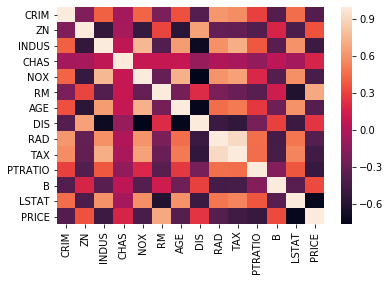

In [40]:
import seaborn as sns
sns.heatmap(raw.corr());

### Step 3).  Fit an instance of the `LinearRegression` algorithm using *at least* 1 variable, but with more if you choose.

In [41]:
# your code here
# regress on number of rooms, crime rate, student - teach ratio

X = raw[['RM', 'CRIM', 'PTRATIO']]
y = raw['PRICE']

In [42]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 4).  Verify your coefficients and intercept term, and make a column for your predictions

In [43]:
# your code here
lreg.coef_

array([ 7.3804111 , -0.20496083, -1.0695461 ])

In [44]:
lreg.intercept_

-3.370704335154219

### Step 5).  Score your model

In [45]:
# your code here
lreg.score(X,y)

0.5943412940723471

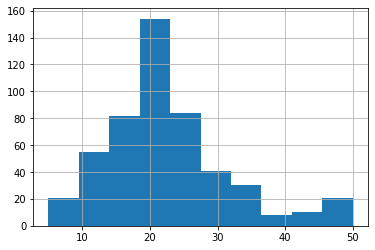

In [47]:
%matplotlib inline
y.hist();

### Step 6). Adding Additional Terms

You have a fairly simple regression model right now, but there's lots of reasons to think that you can improve it. For now, try and identify at least 1 good variable to add to `X`.  

This should be a  variable that you expect will have a large impact on the value of `y`, that's independent of everything else.

**Hint:** the `pairplot` and `heatmap` from `Seaborn` are very helpful here.

**Also:** Are there any other terms that, when compared to the others, look like they might have the same effect?

Try a few different versions of `X`, and use your r-squared value to determine whether or not you've made an improvement.

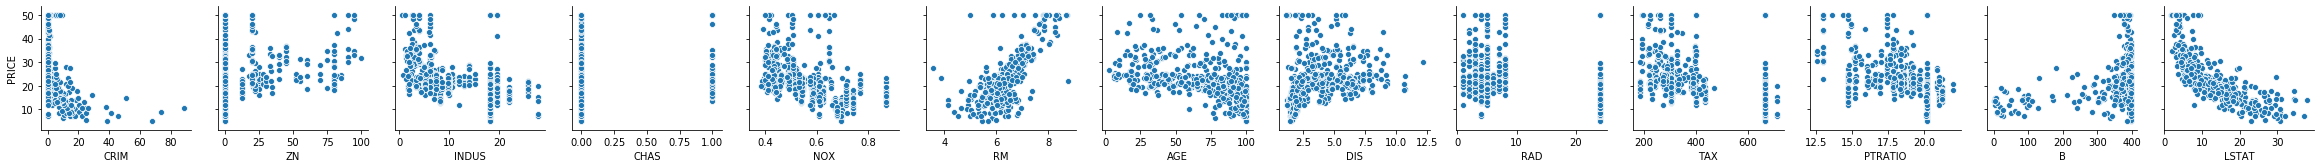

In [48]:
# your code here
import seaborn as sns

sns.pairplot(raw, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars=['PRICE']);

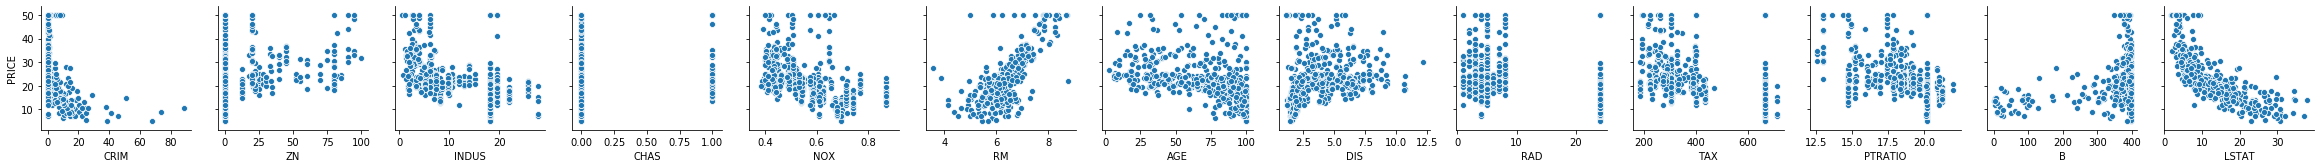

In [49]:
sns.pairplot(raw, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars=['PRICE']);

In [50]:
X_2 = raw[['RM', 'LSTAT', 'INDUS']]
y_2 = raw['PRICE']

In [51]:
lreg.fit(X_2, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lreg.intercept_

-0.9686524884038832

In [53]:
lreg.score(X_2,y_2)

0.6399917132069013

### Step 7a). Residuals

Create an `Error` column that's the difference between the predictions of your best model and the `PRICE` column.

In [55]:
# your code here
raw['PREDICTION'] = lreg.predict(X_2)

In [56]:
raw['ERROR'] = raw['PRICE']-raw['PREDICTION']
#residual of an observed value is the difference between the observed value and the estimated value of the quantity of interest 

In [57]:
raw.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  PREDICTION     ERROR  
0  396.90   4.98   24.0   29.223109 -5.223109  
1  396.90   9.14   21.6   25.614912 -4.014912  
2  392.83   4.03   34.7   32.591596  2.108404  
3  394.63   2.94   33.4   32.615292  0.784708  
4  396.90   5.33   36.2   31.921242  4.278758

### 7b).  What is the average value of the `Error` column?

In [58]:
# your code here
raw['ERROR'].mean()

#it's never exactly zero but it should be close to zero! 

-7.986584604022864e-15

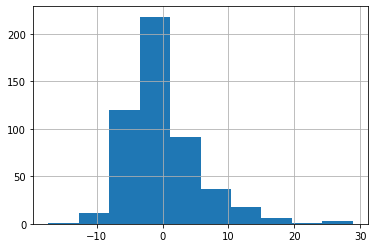

In [59]:
# your code here
raw['ERROR'].hist();

#residuals should be normally distributed 
#but testing for normality can be tricky
#can also do statistical test but rigor is too high

## Plotting

Make the following plots to verify your results:

### 8a).  Plot your `Prediction` column vs the `PRICE` column using `regplot` in `Seaborn`

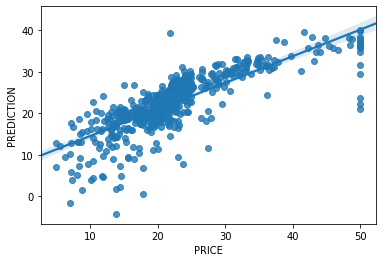

In [60]:
# your code here

sns.regplot(x='PRICE', y ='PREDICTION', data=raw);

### 8b).  Plot your `Residual` column vs your `Prediction` column


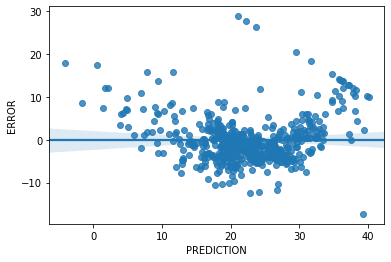

In [61]:
# your code here
sns.regplot(x='PREDICTION', y ='ERROR', data=raw);

#size of error is independent of the prediction made
#can now see if model is systematically biased in one direct or other 
#does not speak to accuracy
#DOES speak to validity
#nothing about r-squared value! 

### 8c).  Plot your `Residual` column vs your `PRICE` column

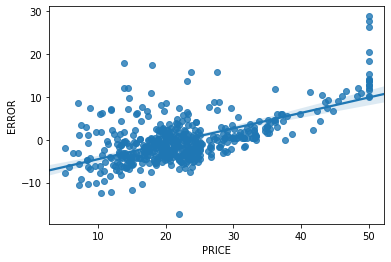

In [62]:
sns.regplot(x='PRICE', y ='ERROR', data=raw);

In [63]:
#https://en.wikipedia.org/wiki/Errors_and_residuals